# Analiza sportowa - Analiza Danych
## Projekt realizowany w ramach przedmiotu: Metody Przetwarzania Dużych Ilości Danych
### Grupa projektowa:
+  Filip Kozak
+  Maciej Grzela
+  Paweł Owczarek
+  Szymon Tusznio

### Zaimportowanie wykorzystywanych bibliotek oraz konfiguracja wyświetlania zbiorów danych dla biblioteki Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 320)
css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

### Wczytanie danych z pliku csv oraz zapisanie ich do struktury DataFrame dostępnej w ramach biblioteki Pandas

In [7]:
transfer_df = pd.read_csv(
    'transfers-data-frame-cleared.csv',
    sep=',',
    header=0,
    index_col=0,
)

transfer_df = transfer_df.fillna("")

(16087, 17)

### Wyświetlenie szczegółów dotyczących zbioru danych

In [9]:
display(transfer_df.head(10))
display(transfer_df.shape)
display(transfer_df.info())
display(transfer_df.describe())

,Club,ClubLeagueLevel,ClubLeagueNationality,Player,PlayerAge,PlayerPosition,PlayerPositionScut,PlayerNationality,Operation,Bought/Sold,PlayerMarketValue,ClubAssigned,ClubAssignedLeagueLevel,ClubAssignedLeagueNationality,TransferValue,PlayerWithoutClub,PlayerGenericPosition
1,Legia Warszawa,1.liga,Polska,Ernest Muci,19,Środkowy napastnik,ŚNP,Albania,Transfer,Kupiony,1000000.0,KF Tirana,1.liga,Albania,500000.0,False,Napastnik
2,Legia Warszawa,1.liga,Polska,Josip Juranovic,24,Prawy obrońca,POB,Chorwacja,Transfer,Kupiony,2500000.0,HNK Hajduk Split,1.liga,Chorwacja,400000.0,False,Obrońca
3,Legia Warszawa,1.liga,Polska,Jasur Yakhshiboev,23,Prawy napastnik,PNP,Uzbekistan,Transfer,Kupiony,700000.0,Pakhtakor Tashkent,1.liga,Uzbekistan,300000.0,False,Napastnik
4,Legia Warszawa,1.liga,Polska,Rafa Lopes,29,Środkowy napastnik,ŚNP,Portugalia,Transfer,Kupiony,500000.0,Cracovia,1.liga,Polska,150000.0,False,Napastnik
5,Legia Warszawa,1.liga,Polska,Bartosz Kapustka,23,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,1500000.0,Leicester City,1.liga,Anglia,0.0,False,Pomocnik
6,Legia Warszawa,1.liga,Polska,Artur Boruc,40,Bramkarz,BRK,Polska,Transfer,Kupiony,50000.0,AFC Bournemouth,2.liga,Anglia,0.0,False,Bramkarz
7,Legia Warszawa,1.liga,Polska,Filip Mladenovic,28,Lewy obrońca,LOB,Serbia,Transfer,Kupiony,2500000.0,Lechia Gdańsk,1.liga,Polska,0.0,False,Obrońca
8,Legia Warszawa,1.liga,Polska,Michal Karbownik,19,Prawy obrońca,POB,Polska,Wypożyczenie,Kupiony,5000000.0,Brighton & Hove Albion,1.liga,Anglia,0.0,False,Obrońca
9,Legia Warszawa,1.liga,Polska,Joel Valencia,25,Lewy napastnik,LNP,Ekwador,Wypożyczenie,Kupiony,400000.0,FC Brentford,1.liga,Anglia,0.0,False,Napastnik
10,Legia Warszawa,1.liga,Polska,Bartlomiej Ciepiela,19,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,0.0,Legia Warszawa II,4.liga,Polska,0.0,False,Pomocnik


(16087, 17)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16087 entries, 1 to 19019
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           16087 non-null  object 
 1   ClubLeagueLevel                16087 non-null  object 
 2   ClubLeagueNationality          16087 non-null  object 
 3   Player                         16087 non-null  object 
 4   PlayerAge                      16087 non-null  int64  
 5   PlayerPosition                 16087 non-null  object 
 6   PlayerPositionScut             16087 non-null  object 
 7   PlayerNationality              16087 non-null  object 
 8   Operation                      16087 non-null  object 
 9   Bought/Sold                    16087 non-null  object 
 10  PlayerMarketValue              16087 non-null  float64
 11  ClubAssigned                   16087 non-null  object 
 12  ClubAssignedLeagueLevel        16087 non-null 

None

,PlayerAge,PlayerMarketValue,TransferValue
count,16087.000000,1.608700e+04,1.608700e+04
mean,24.795487,2.450819e+06,8.595076e+05
std,4.252338,5.795068e+06,4.326322e+06
min,15.000000,0.000000e+00,0.000000e+00
25%,22.000000,2.500000e+05,0.000000e+00
50%,24.000000,6.000000e+05,0.000000e+00
75%,28.000000,2.000000e+06,0.000000e+00
max,40.000000,8.000000e+07,8.000000e+07


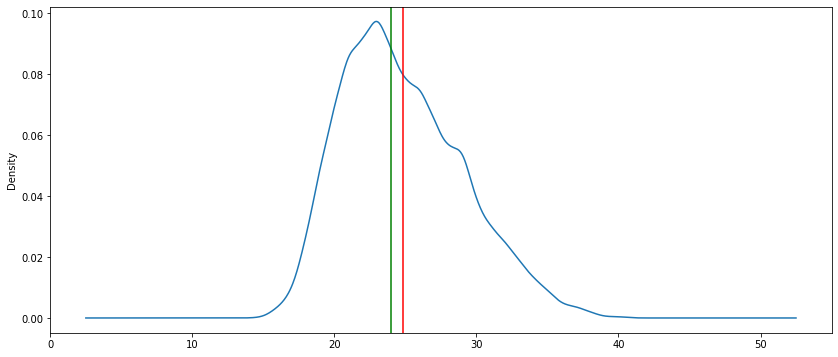

In [10]:
ax = transfer_df['PlayerAge'].plot(kind='density', figsize=(14,6))
ax.axvline(transfer_df['PlayerAge'].mean(), color='red')
ax.axvline(transfer_df['PlayerAge'].median(), color='green')